<a href="https://colab.research.google.com/github/aish0606/ImageProcessing/blob/main/morphological_operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Links
# https://en.wikipedia.org/wiki/Mathematical_morphology
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm
# https://en.wikipedia.org/wiki/Sobel_operator
# https://en.wikipedia.org/wiki/Image_gradient
# https://stackoverflow.com/questions/32602018/what-is-depth-in-image-processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_img():
  black_img = np.zeros((400,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(black_img, 'ABCD', org=(100, 200), fontFace=font, fontScale=5, color=(255,255,255), thickness=25)
  return black_img

In [ ]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

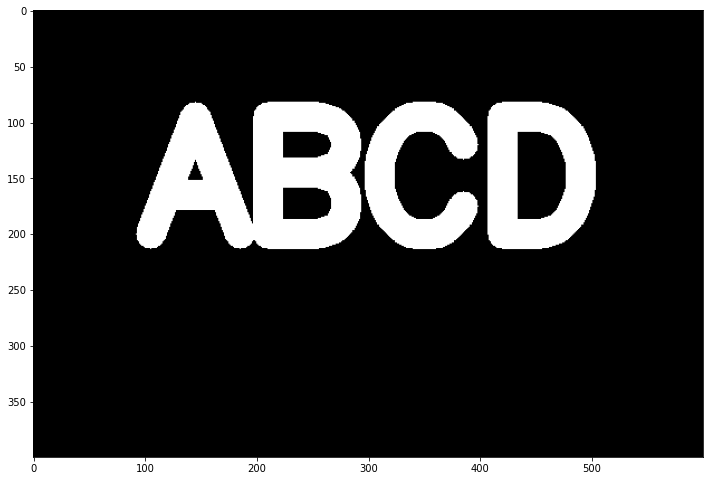

In [ ]:
img = load_img()
display_img(img)

EROSION: Erode the boundary of the text written. Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [ ]:
kernel = np.ones(shape=(5,5), dtype=np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


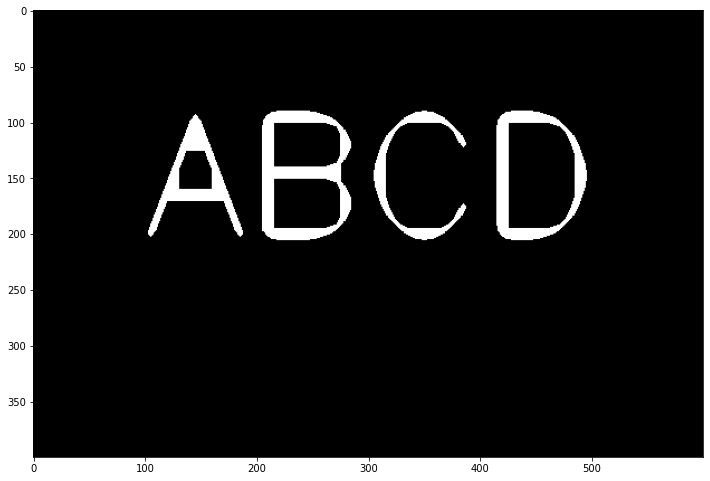

In [ ]:
erode_img = cv2.erode(img, kernel, iterations=4)
display_img(erode_img)

###DILATION
size of foreground object increases

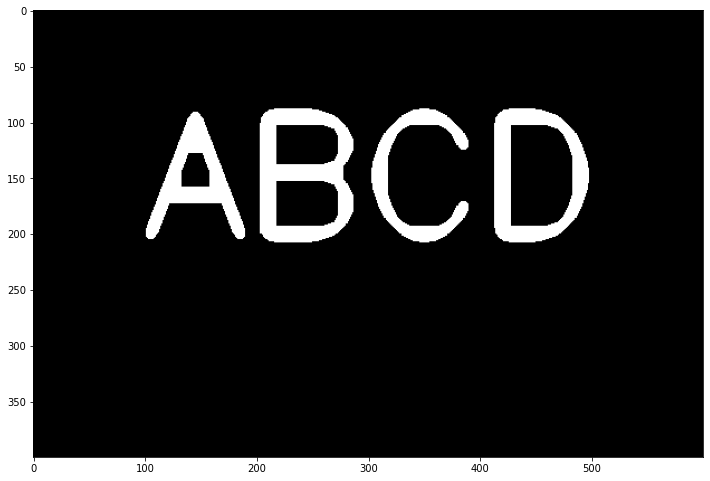

In [ ]:
kernel = np.ones(shape=(5,5), dtype=np.uint8)
dilate_img = cv2.dilate(erode_img, kernel, iterations=1)
display_img(dilate_img)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

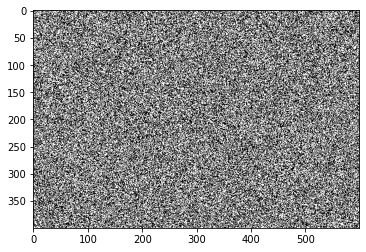

In [ ]:
img = load_img()
# Creating noise over the image
noise = np.random.randint(low=0, high=2, size=img.shape)
plt.imshow(noise, cmap='gray')

In [ ]:
255. in img

True

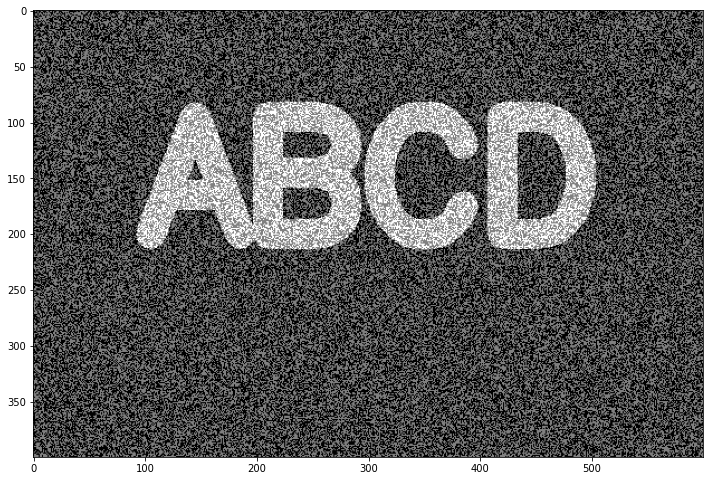

In [ ]:
# img has pixel value as 0 and 255, but noise has value 0 and 1.
# So multiply noise with 255
white_noise = noise * 255.
noisy_img = img + white_noise
display_img(noisy_img)

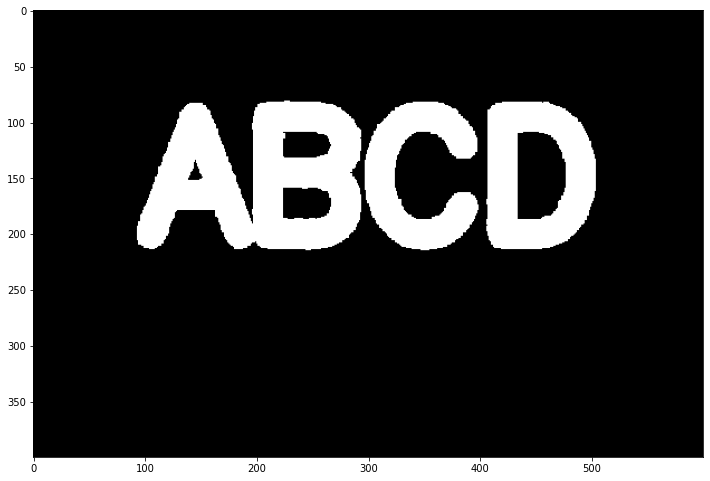

In [ ]:
# to remove this background img use opening
kernel = np.ones((5,5), dtype=np.uint8)
open_img = cv2.morphologyEx(noisy_img, cv2.MORPH_OPEN, kernel)
display_img(open_img)

### Closing
 Dilation followed by Erosion. Useful in removing noise from foreground objects, such as black dots on top of the white text.

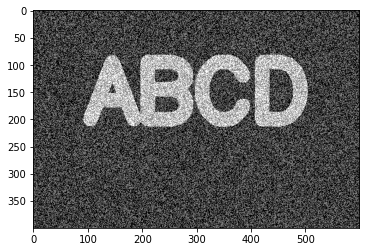

In [ ]:
img = load_img()
noise = np.random.randint(low=0, high=2, size=img.shape)
# blck noise means we are creating noise over the text only
black_noise = noise * -255
black_noisy_img = img + black_noise
plt.imshow(black_noisy_img, cmap='gray')

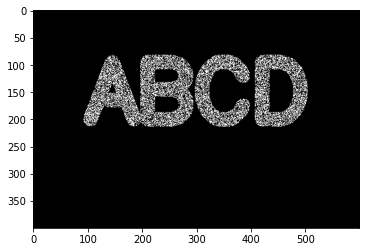

In [ ]:
# to remove background noise
black_noisy_img[black_noisy_img == -255] = 0
plt.imshow(black_noisy_img, cmap='gray')

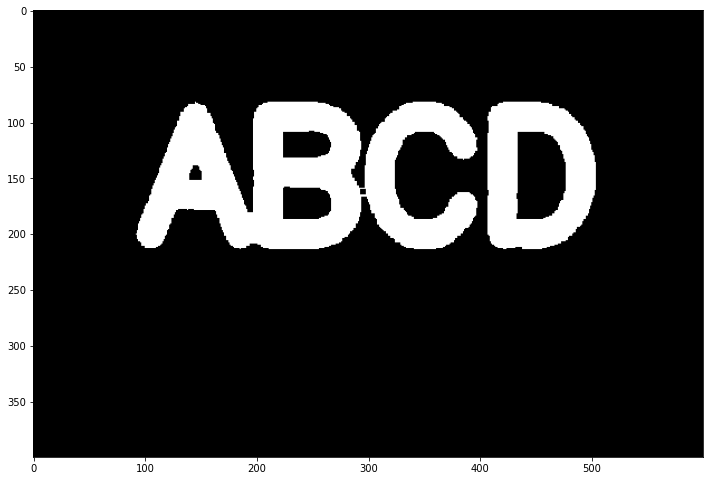

In [ ]:
close_img = cv2.morphologyEx(black_noisy_img, cv2.MORPH_CLOSE, kernel)
display_img(close_img)

### Morphological Gradient

Difference between dilation and erosion of an image.
This is used in edge detection, segmentation and to find the outline of an object.

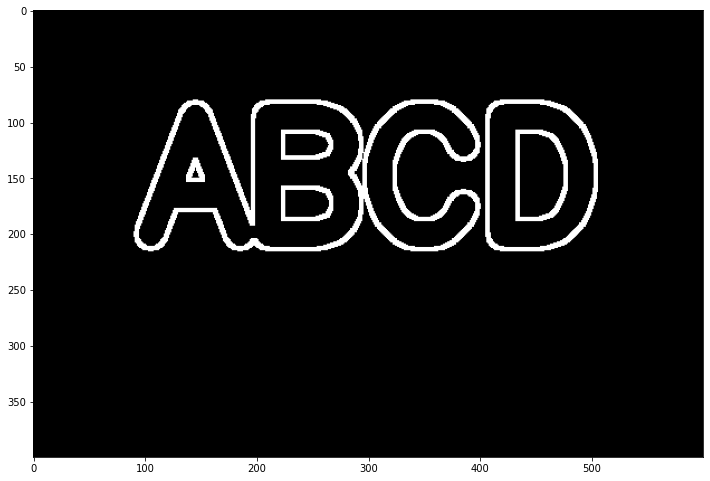

In [ ]:
img = load_img()
gradient_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient_img)

###IMAGE GRADIENT
Detecting edge of the image

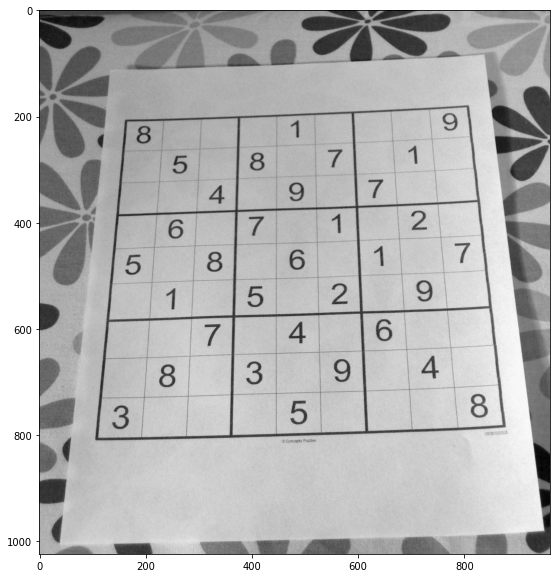

In [ ]:
sudoku = cv2.imread('DATA/sudoku.jpg', 0)
display_img(sudoku)


##SOBEL 
Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise.

In [ ]:
sobelx = cv2.Sobel(sudoku, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(sudoku, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(sudoku, cv2.CV_64F, ksize=5)

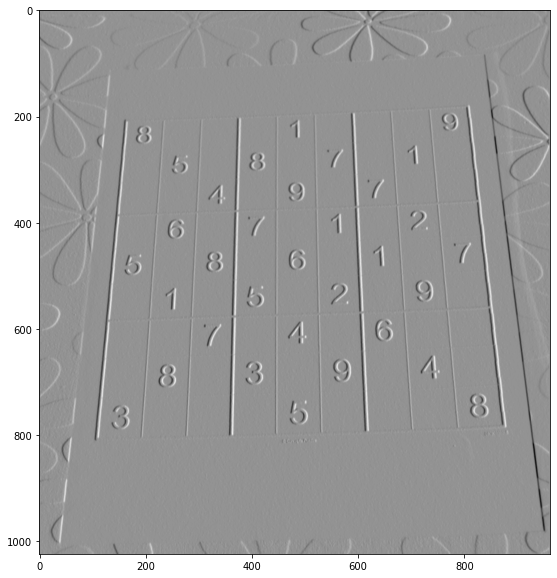

In [ ]:
display_img(sobelx)

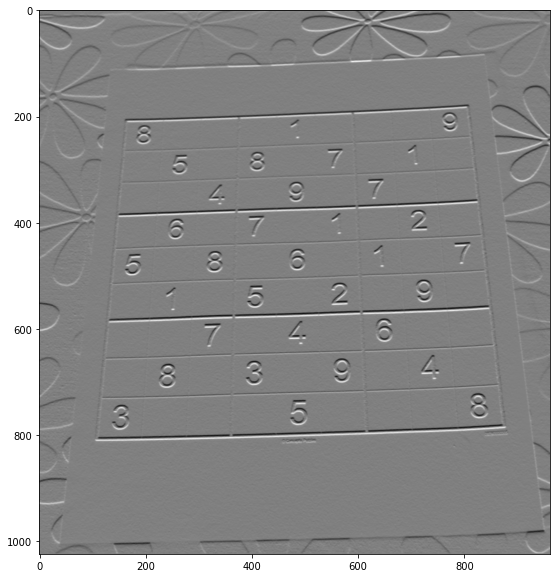

In [ ]:
display_img(sobely)

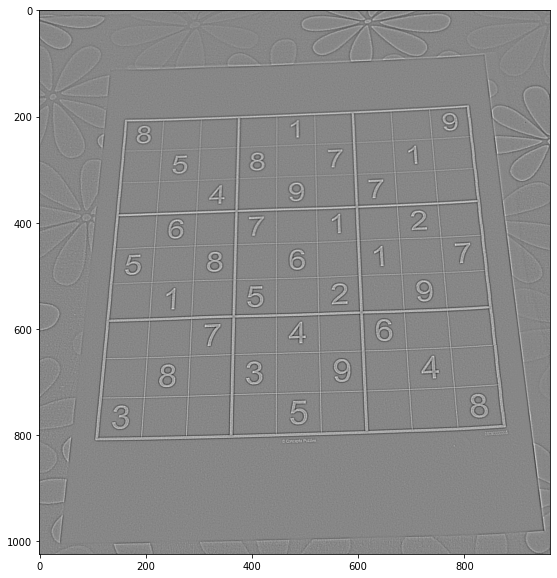

In [ ]:
display_img(laplacian)

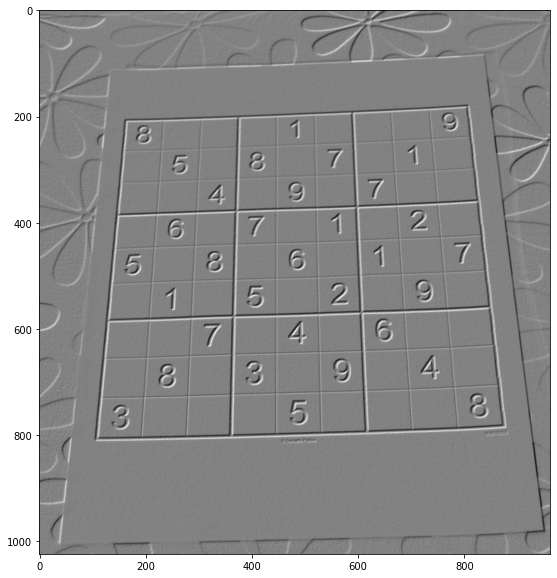

In [ ]:
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
display_img(sobelxy)

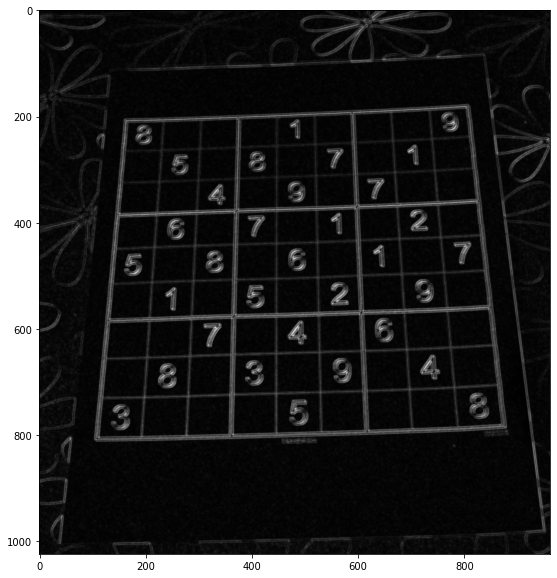

In [ ]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(sobelxy,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)